#Project 11. Historical wordEmbedding 1

This project aims to explore the distribution of selected keywords in historical corpuses to provide insights in terms of their temporal dynamic with respect to their contextual meaning.

In [1]:
!pip install vaderSentiment

In [2]:
! pip install pyLDAvis

In [3]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
import nltk
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
import itertools
import gensim.downloader as api
import plotly
import plotly.graph_objs as go
import requests as req
import pyLDAvis
import pyLDAvis.gensim
import warnings

## Task 1

Consider a book database of your choice, e.g., ISBNdb database | ISBNdb, use the API or any web crawling of your choice to collect book titles, spanning in the period 1900 till 2020. Use the ranges: 1900-1940; 1941-1960; 1961-1980; 1981-2000; 2001-2010; 2011-2020.  Use the keyword “hate” as a guidelines for the search. Retrieve 100 titles (for each period of time), provided there are enough outputs. Save the result in a database file. We shall refer to the dataset corresponding to each time period as a corpus.

In [4]:
h = {'Authorization': '50884_4ccefdf653c1b96bc2498ce22bb07313'} # The API Key to access to the ISBNdb database


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
def time_period(year_start,year_end):
  ''' We create a list which contains all the years of the time period'''
  period=[str(i) for i in range(year_start,year_end + 1)]
  return( period)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def get_titles(year):
  ''' We recover all the titles which contains the word "hate" from one specific year '''
  year_books = req.get("https://api2.isbndb.com/books/hate?page=1&pageSize=1000&year=" + str(year), headers=h).json()
  books_titles = []
  if "total" in year_books:
    for i in range(year_books["total"]):
      books_titles.append(year_books["books"][i]["title"])
  # else :
  #   books_titles = [None]
  return books_titles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def result_search(time_period):
  ''' We pick up only 100 titles for each period of time '''
  result=[]
  i=0
  while len(result)<100 and i!=(len(time_period)):
    titles = get_titles(time_period[i])
    for title in titles :
      if len(result)<100:
        result.append(title)
    i=i+1
  return(result)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1900-1940

In [8]:
titles_1900_1940 = result_search(time_period(1900,1940))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1941-1960

In [9]:
titles_1941_1960 = result_search(time_period(1941,1960))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1961-1980

In [10]:
titles_1961_1980 = result_search(time_period(1961,1980))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1981-2000

In [11]:
titles_1981_2000 = result_search(time_period(1981,2000))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2001-2020

In [12]:
titles_2001_2020 = result_search(time_period(2001,2020))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# We save all the titles from all the period of time in a txt file
corpus_all_period = [titles_1900_1940, titles_1941_1960, titles_1961_1980, titles_1981_2000, titles_2001_2020]
time=["1900-1940 : ","1941-1960 : ","1961-1980 : ","1981-2000 : ","2001-2020 : "]
fichier_corpus = open("corpus.txt", "w")

i=0
for period in corpus_all_period:
  fichier_corpus.write(time[i])
  for title in period:
    fichier_corpus.write(title)
    fichier_corpus.write(", ")
  fichier_corpus.write("\n")
  i=i+1
fichier_corpus.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# We read all the titles from all the period of time from the txt file previously created
corpus_all_period =[]
fichier = open("corpus.txt", "r")
lines = fichier.readlines()
for l in lines:
  l = l[12:].split(",") # We remove the dates periods at the beginning
  corpus_all_period.append(l)

titles_1900_1940 = corpus_all_period[0]
titles_1941_1960 = corpus_all_period[1]
titles_1961_1980 = corpus_all_period[2]
titles_1981_2000 = corpus_all_period[3]
titles_2001_2020 = corpus_all_period[4]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Task 2

Use wordcloud representation to illustrate the content of each corpus. See example in Word Cloud: A Text Visualization tool | by Sawan Rai | Analytics Vidhya | Medium

In [15]:
def wordcloud(corpus):
  ''' We generate the worcloud representation for each corpus'''
  input = " ".join(corpus)
  wordcloud = WordCloud().generate(input)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


1900 to 1940


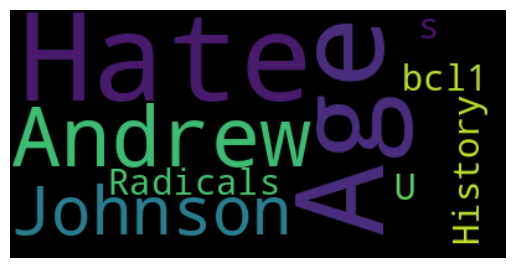

1941 to 1960


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


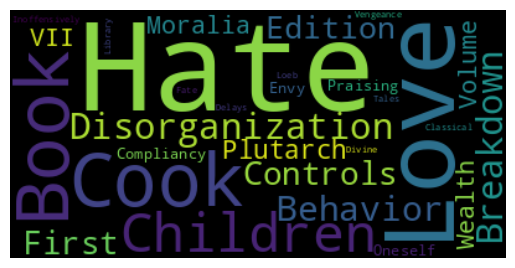

1961 to 1980


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


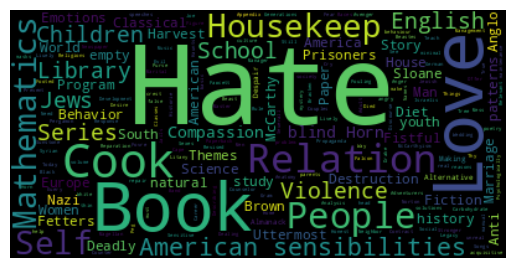

1981 to 2000


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


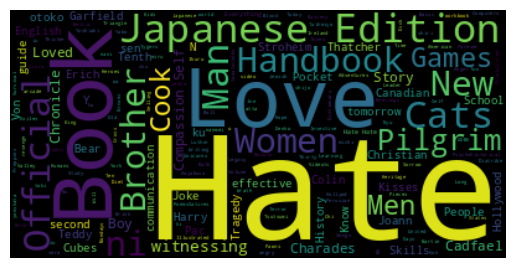

2001 to 2020


/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


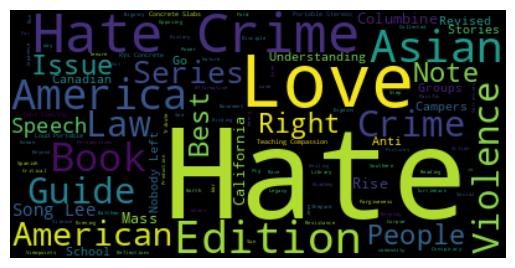

In [16]:
time_periods=["1900 to 1940", "1941 to 1960","1961 to 1980", "1981 to 2000", "2001 to 2020"]
for i, period in enumerate(corpus_all_period) :
  print(time_periods[i])
  wordcloud(period)


## Task 3

Suggest a script that allows to check whether there are common results (book titles) among the various corpuses.

In [17]:
def common_period(title, period):
  ''' Research of one title in one specific period'''
  if title in period:
    return True
  return False

def common_corpus(title, corpus):
  ''' Research of one title in the all corpus'''
  for period in corpus:
    if common_period(title, period):
      return True
  return False

def common_result(corpus):
  ''' Research of common title across the corpus'''
  time_periods=["1900 to 1940", "1941 to 1960","1961 to 1980", "1981 to 2000", "2001 to 2020"]
  for n, period in enumerate(corpus):
    print(time_periods[n], ":")
    corpus_testing = corpus[:n] + corpus[n+1:]
    for title in period:
      if common_corpus(title, corpus_testing):
        print("\t", title)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
common_result(corpus_all_period)

1900 to 1940 :
	  

1941 to 1960 :
	  Love Against Hate
	  Love Against Hate
	  I Hate to Cook Book
	  

1961 to 1980 :
	  Love
	  Love Against Hate
	  Most Deadly Hate
	  Love
	  Hate
	  Most Deadly Hate
	  I Hate to Cook Book
	  

1981 to 2000 :
	  Hate You
	  From Hate to Love
	  I Hate to Cook Book
	  Most Deadly Hate
	  

2001 to 2020 :
	  Hate
	  From Hate to Love
	  From Hate to Love
	  Hate You
	  Love
	  



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Task 4

Write a script that allows you to draw the histogram showing the 20 most common words of each time period, excluding stopwords. You may inspire from online NLTK book

In [19]:
nltk.download('stopwords')
stopwords=sorted(set(stopwords.words('english')))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def remove_stopwords(sentence):
  '''We remove the stopwords from the sentence'''
  sentence_split=sentence.lower().split()
  for word in stopwords:
    for l in sentence_split :
      if word==l:
         sentence_split.remove(l)
  return(' '.join (sentence_split))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def remove_punctuation(sentence):
  '''We remove the punctuation of all the tittles'''
  return sentence.translate(str.maketrans('', '', string.punctuation))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def histo_words (corpus):
  ''' Plot the histogram of the frequency of words of the period focused'''
  input = " ".join(corpus)
  fdist1 = nltk.FreqDist(remove_stopwords(remove_punctuation(input)).split())
  words, occurence = zip(*fdist1.most_common(20)) # I separate words form their occurence
  plt.figure(figsize=(30, 6))
  plt.bar(words,occurence) # I plot the histogram
  plt.xlabel('Words')
  plt.ylabel('Number of occurence')
  plt.title('Histogram of the most frequent words in the corpus')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1900 to 1940


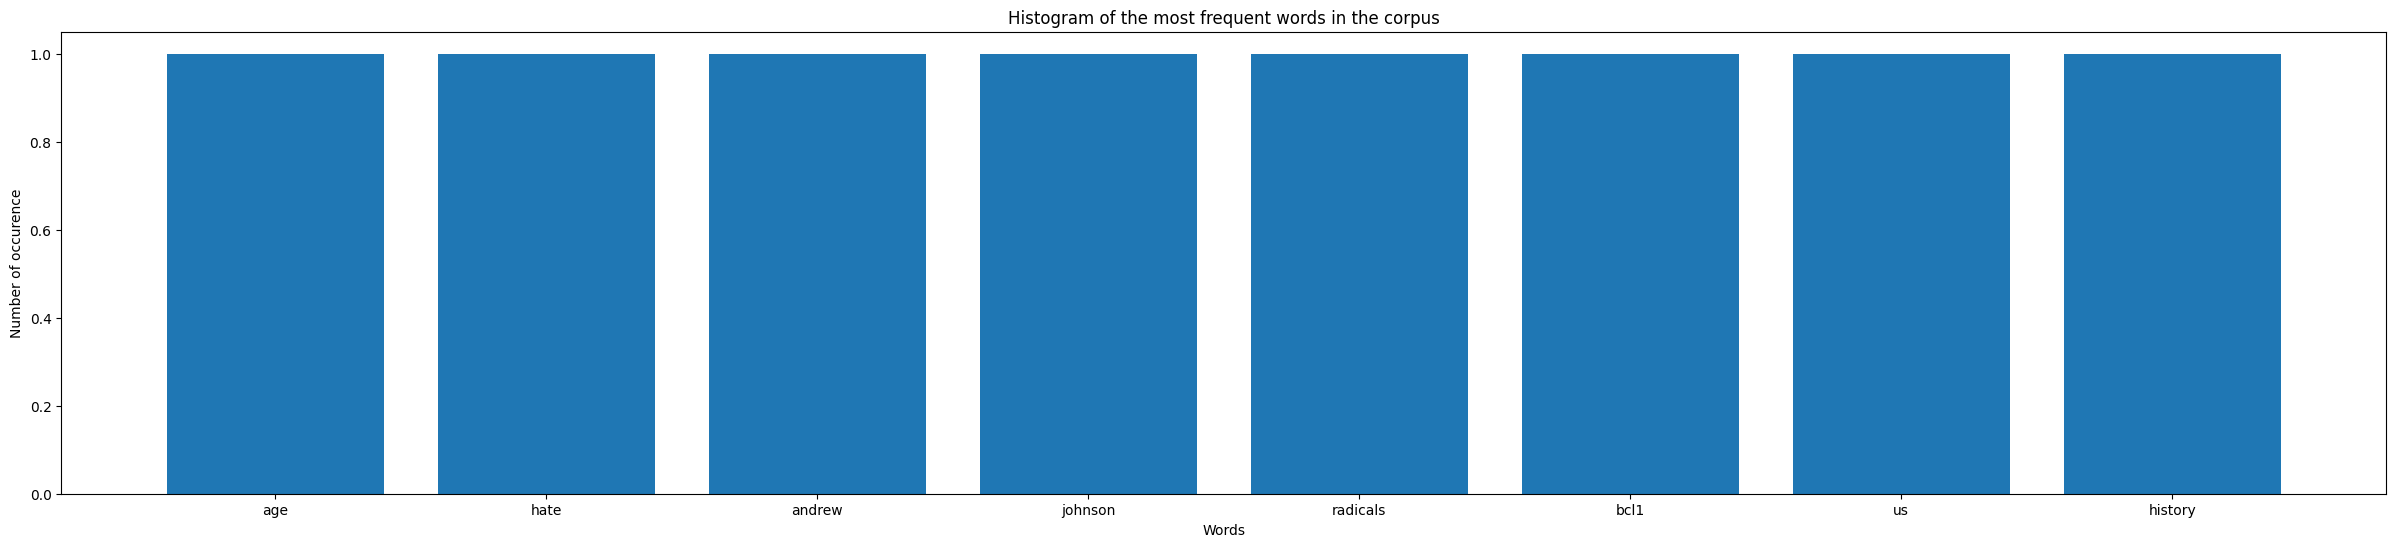

1941 to 1960


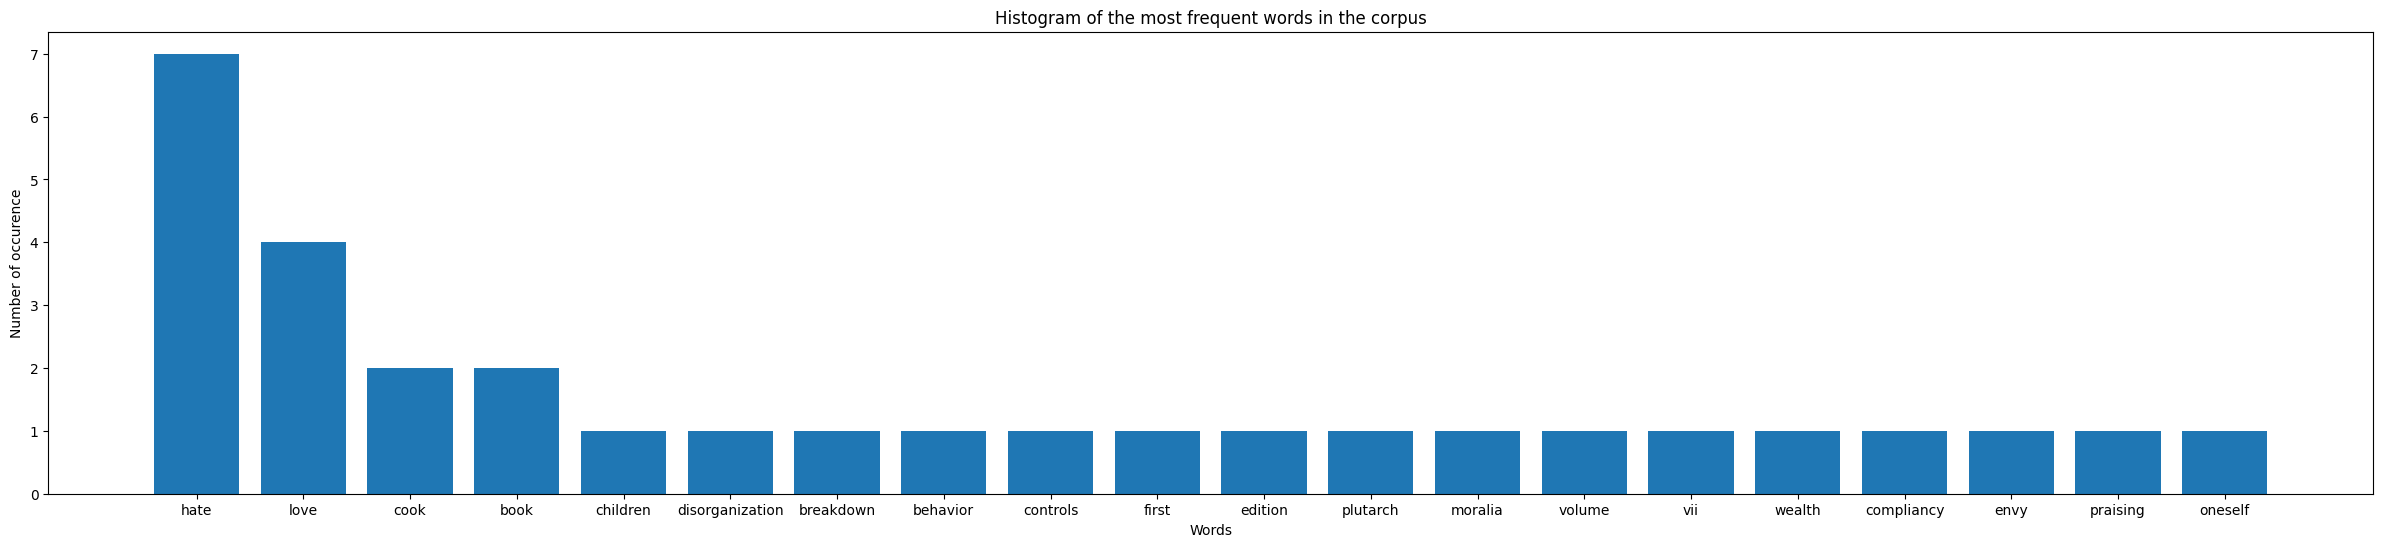

1961 to 1980


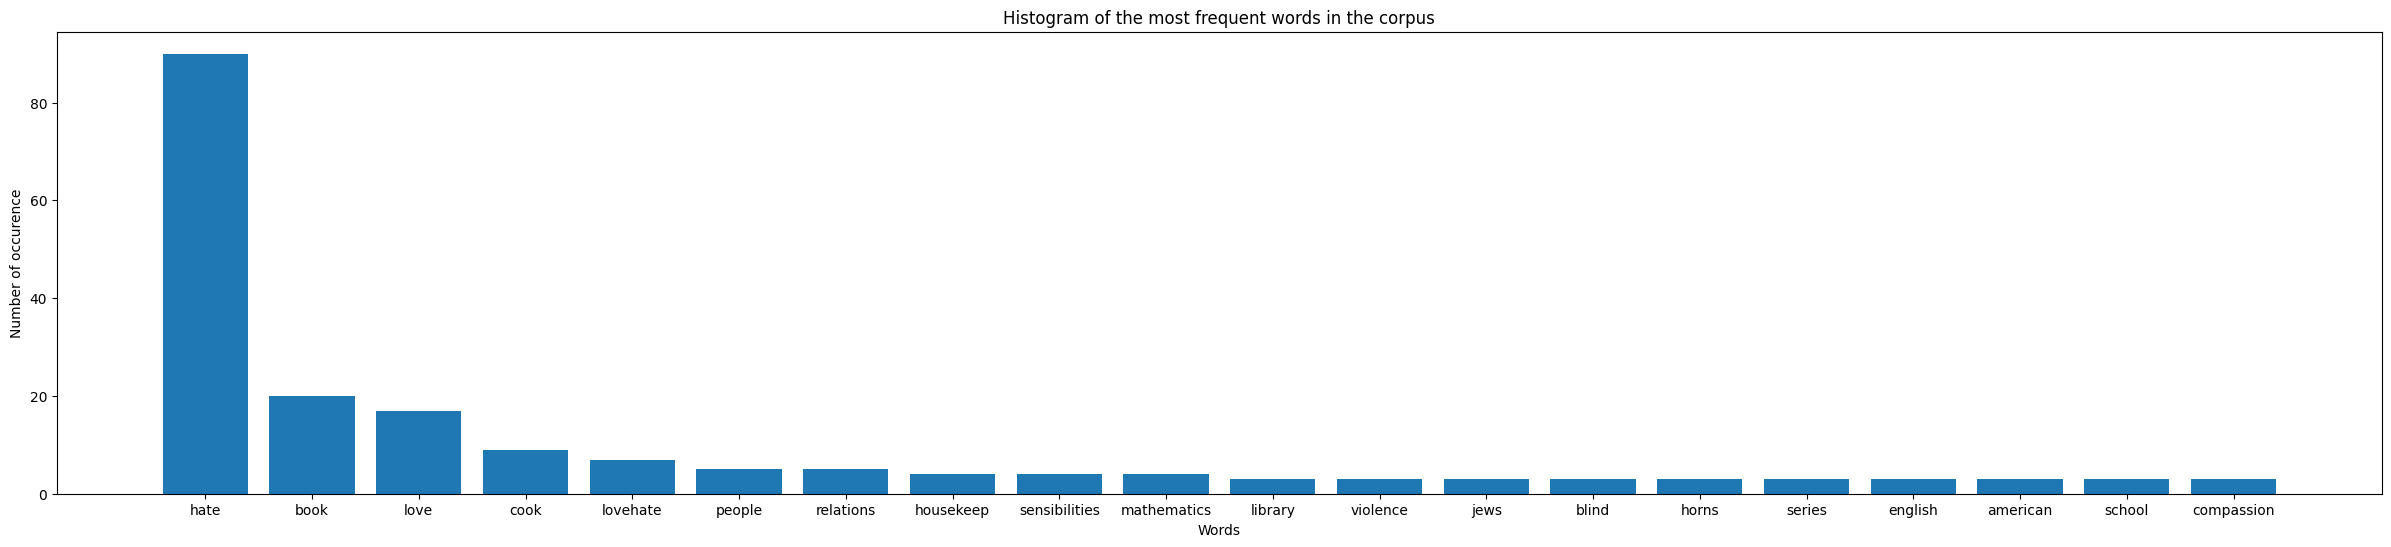

1981 to 2000


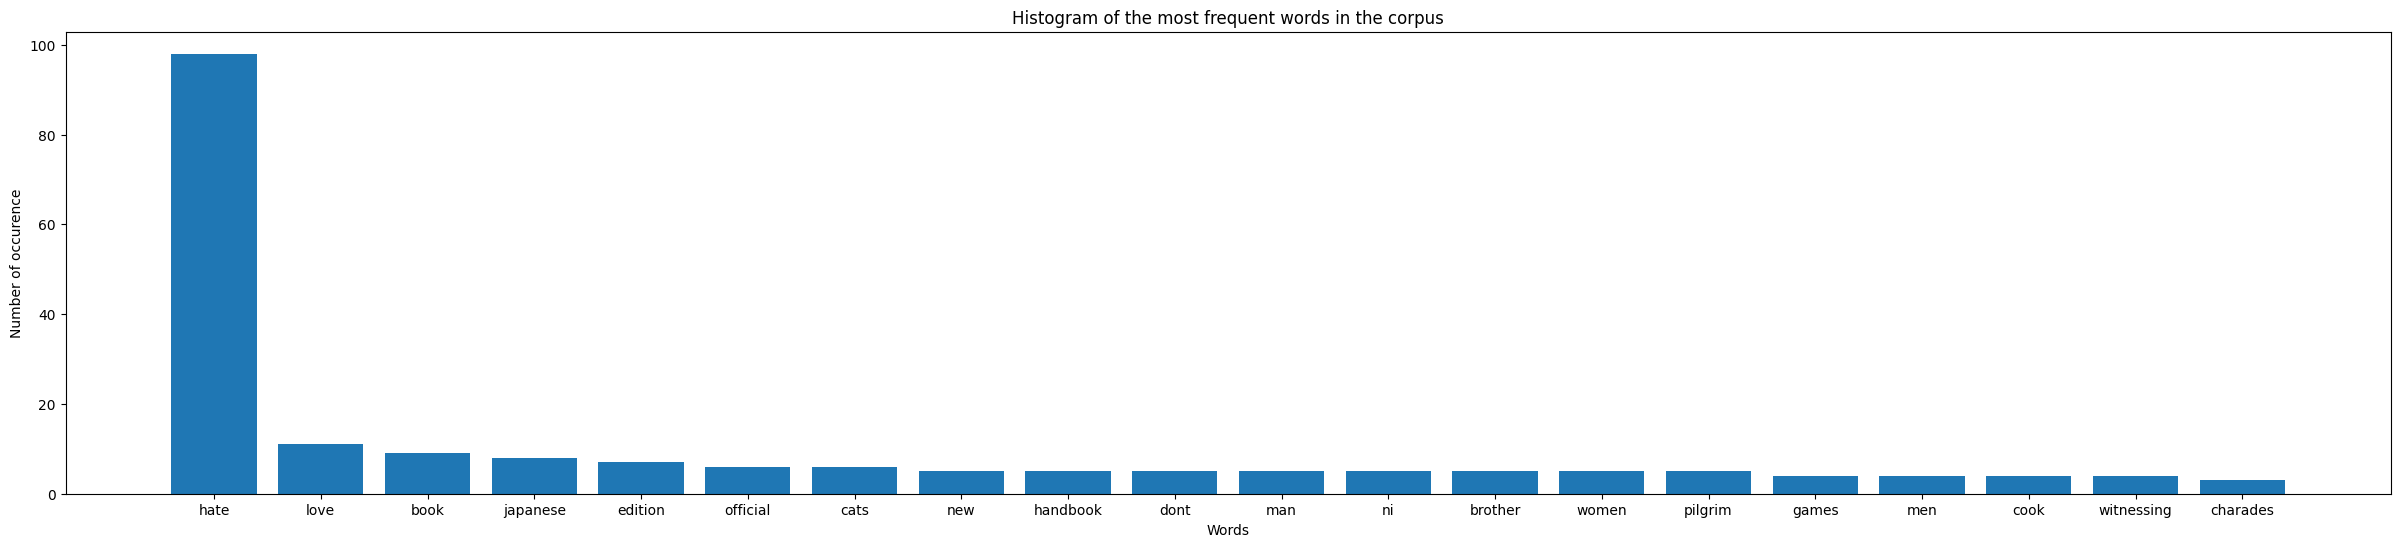

2001 to 2020


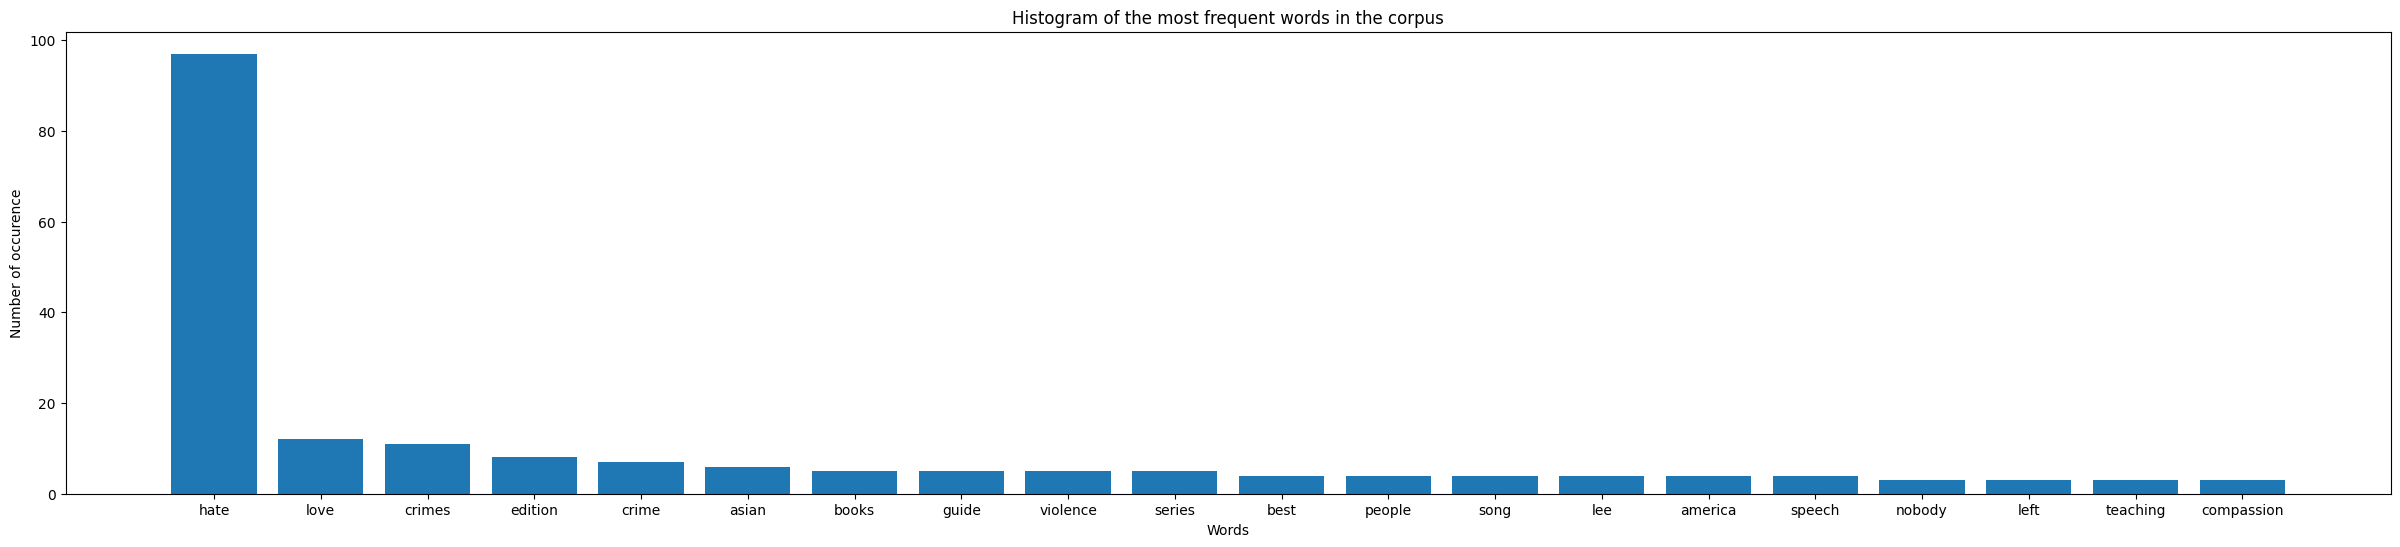

In [23]:
time_periods=["1900 to 1940", "1941 to 1960","1961 to 1980", "1981 to 2000", "2001 to 2020"]
for i, period in enumerate(corpus_all_period) :
  print(time_periods[i])
  histo_words(period)

## Task 5

Now use topic modelling using Latent Dirichlet Allocation (LDA) as implemented in Gensim library for each corpus of titles corresponding to a given period of time. Use number of topics=5 and number of keywords per topic = 5.  Use appropriate visualization of your choice to illustrate the overlapping among the topics at different time period.

In [24]:
def cleaning(corpus):
  ''' Remove all the punctuation and stopwords from all the titles from each corpus'''
  return([remove_stopwords(remove_punctuation(x)).split() for x in corpus])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def LDA_model(corpus):
  '''Creates the LDA_model of each corpus and plot it'''
  corpus_cleaned=cleaning(corpus)
  common_dictionary = Dictionary(corpus_cleaned)
  common_corpus = [common_dictionary.doc2bow(title) for title in corpus_cleaned]
  lda_model = LdaModel(common_corpus, num_topics=5,passes=1000,id2word=common_dictionary)
  topics=lda_model.print_topics(num_words=5)
  pyLDAvis.enable_notebook()
  vis = pyLDAvis.gensim.prepare(lda_model, common_corpus, common_dictionary)
  return(pyLDAvis.display(vis))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
LDA_model(titles_1900_1940)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Task 6

Use word2vec model as implemented in Genism (pretrained model) to illustrate the closeness of word “hate” with words of each corpus. For this purpose, we want to compare the embedding of “hate” and that of the main words in each corpus (excluding stopwords) and then perform dimension reduction to illustrate in 2D space. For this purpose, use the t-SNE representation. See an example in Visualizing Word Vectors with t-SNE | Kaggle.

In [27]:
# = api.load('text8')  # download the corpus and return it opened as an iterable
model = api.load('word2vec-google-news-300')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[--------------------------------------------------] 0.8% 13.2/1662.8MB downloaded

KeyboardInterrupt: ignored

In [ ]:
def cleaning(corpus):
  ''' Remove all the punctuation and stopwords from all the titles from each corpus'''
  return([remove_stopwords(remove_punctuation(x)).split() for x in corpus])

In [ ]:
def Sim_trained(corpus_period, word, common_max = 20, see_exception = False):
  '''Calculate the distance with the cosine similarity for the corpus (one period)'''
  corpus_final= []
  words=[]

  embedding_word = model[word]
  cleaned_corpus=cleaning(corpus_period)
  corpus_final=list(itertools.chain.from_iterable(cleaned_corpus))

  # Take only the 20 most common words of the periode (corpus)
  fdist1 = nltk.FreqDist(corpus_final)
  most_common = fdist1.most_common(common_max)
  for i in range(len(most_common)):
    words.append(most_common[i][0])

  # For each words, calculate the similarity with the word
  word_embeddings=[]
  result=[]
  for word in words:
    try :
      word_embeddings_model = model[word]
      word_embeddings.append(word_embeddings_model)
      similarity = np.dot(embedding_word,word_embeddings_model) / (np.linalg.norm(embedding_word) * np.linalg.norm(word_embeddings_model))
      result.append((similarity,word))
    except:
      words.remove(word)
      if see_exception:
        print(f"The word {word} is not present in the model")

  return(result)

In [ ]:
Sim_trained(titles_1900_1940,"hate", see_exception=True)

In [ ]:
Sim_trained(titles_1941_1960,"hate", see_exception = True)

In [ ]:
Sim_trained(titles_1961_1980,"hate")

In [ ]:
Sim_trained(titles_1981_2000,"hate")

In [ ]:
Sim_trained(titles_2001_2020,"hate")

In [ ]:
def tsne_plot(model,corpus):
    "Creates and TSNE model and plots it"
    labels = []
    corpus_final=[]
    words=[]
    cleaned_corpus=cleaning(corpus)
    corpus_final=list(itertools.chain.from_iterable(cleaned_corpus))
    for i in range(len(corpus_final)):
      words.append(corpus_final[i])
    word_embeddings=[]
    for word in words:
      try :
        word_embeddings.append(model[word]) # We calculate the vector representation for each word
        labels.append(word) # We recover all the word from the corpus
      except:
        words.remove(word)
        print("The word " + word + " is not present in the model")

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = word_embeddings

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model,titles_1900_1940)

In [ ]:
tsne_plot(model,titles_1941_1960)

In [ ]:
tsne_plot(model,titles_1961_1980)

In [ ]:
tsne_plot(model,titles_1981_2000)

In [ ]:
tsne_plot(model,titles_2001_2020)

## Task 7

Repeat 4), when the word2vec model is retrained using each corpus. See again the example in Visualizing Word Vectors with t-SNE | Kaggle.  Use word2vec model to visualize the five words that are more close to “violence” in each corpus.

In [ ]:
def top5(liste):
  '''Give the top 5 element of the list'''
  return(sorted(liste,reverse=True)[:5])

In [ ]:
def train_model(corpus):
  ''' Creates a trained model from the corpus'''
  model = Word2Vec(corpus, vector_size=2000, window=1, min_count=1, sg=0)
  return(model)


In [ ]:
def Sim(corpus,word):
  '''Calculates the distance with the cosine similarity for the corpus (one period)'''
  corpus_final= []
  words=[]
  result=[]
  cleaned_corpus=cleaning(corpus)
  model=train_model(cleaned_corpus)
  try :
    violence_embedding = model.wv[word]
    corpus_final=list(itertools.chain.from_iterable(cleaned_corpus))
    fdist1 = nltk.FreqDist(corpus_final)
    fdist1.most_common(20)
    for i in range(len(fdist1.most_common(20))):
      words.append(fdist1.most_common(20)[i][0])
    word_embeddings = [model.wv[word] for word in words]
    for i in range (len(fdist1.most_common(20))):
      similarity = np.dot(violence_embedding,word_embeddings[i]) / (np.linalg.norm(violence_embedding) * np.linalg.norm(word_embeddings[i]))
      result.append((similarity,words[i]))
  except KeyError :
    print("We can't calculate the similarity calculus with this corpus")
  return(result)

In [ ]:
top5(Sim(titles_1900_1940,"violence"))

In [ ]:
top5(Sim(titles_1941_1960,"violence"))

In [ ]:
top5(Sim(titles_1961_1980,"violence"))

In [ ]:
top5(Sim(titles_1981_2000,"violence"))


In [ ]:
top5(Sim(titles_2001_2020,"violence"))

In [ ]:
def tsne_plot_new_model(corpus):
    "Plots the T-SNE after creation of the new corpus trained model"
    labels = []
    corpus_final=[]
    words=[]
    model = train_model(cleaning(corpus))
    cleaned_corpus=cleaning(corpus)
    corpus_final=list(itertools.chain.from_iterable(cleaned_corpus))

    for i in range(len(corpus_final)):
      words.append(corpus_final[i])
    word_embeddings=[]
    for word in words:
      try :
        word_embeddings.append(model.wv[word])
        labels.append(word)
      except:
        words.remove(word)
        print("The word " + word + " is not present in the model")
    #for word in words:
        #tokens.append(model[word])
        #labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = word_embeddings

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot_new_model(titles_1900_1940)

In [ ]:
tsne_plot_new_model(titles_1941_1960)

In [ ]:
tsne_plot_new_model(titles_1961_1980)

In [ ]:
tsne_plot_new_model(titles_1981_2000)

In [ ]:
tsne_plot_new_model(titles_2001_2020)

## Task 8
Repeat 4) when using Glove embedding instead of word2vec and then use PCA for dimension reduction. You may inspire from example of Visualizing Word Embedding with PCA and t-SNE | by Ruben Winastwan | Towards Data Science.

In [ ]:
def load_glove_vectors(glove_file):
    '''Download the glove's files'''
    word_to_vec = {}  # Create an empty dictionary to store word vectors
    with open(glove_file, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()  # We split the line into words and their corresponding vector values
            word = values[0]  # The first value in the line is the word itself
            vector = np.array(values[1:], dtype='float32')
            word_to_vec[word] = vector  # We store the word and its vector in the dictionary
    return word_to_vec

In [ ]:
glove_model = load_glove_vectors('glove.6B.200d.txt')

In [ ]:
glove_model["hate"]

In [ ]:
def Sim_Glove(corpus):
  ''' Calculate the similarity between all the words of the corpus'''
  corpus_final= []
  words=[]
  result=[]
  cleaned_corpus=cleaning(corpus)
  hate_embedding = glove_model["hate"]
  corpus_final=list(itertools.chain.from_iterable(cleaned_corpus))
  fdist1 = nltk.FreqDist(corpus_final)
  fdist1.most_common(20)
  for i in range(len(fdist1.most_common(20))):
    words.append(fdist1.most_common(20)[i][0])
  for word in words:
    try:
      word_embedding=glove_model[word]
      similarity = np.dot(hate_embedding,word_embedding) / (np.linalg.norm(hate_embedding) * np.linalg.norm(word_embedding))
      result.append((similarity,word))
    except KeyError :
      words.remove(word)
      print("Word " + word + " is not present in the corpus")
  return(result)

In [ ]:
def Sim_Glove_names(Sim_Glove_list):
  '''We recuperate the word from the similarity calculus'''
  names=[]
  for i in range(len(Sim_Glove_list)):
    names.append(Sim_Glove_list[i][1])
  return(names)


In [ ]:
Sim_Glove(titles_1900_1940)

In [ ]:
Sim_Glove(titles_1941_1960)

In [ ]:
Sim_Glove(titles_1961_1980)

In [ ]:
Sim_Glove(titles_1981_2000)

In [ ]:
Sim_Glove(titles_2001_2020)

In [ ]:
def display_pca_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, topn=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:3]
    data = []
    count = 0

    for i in range (len(user_input)):

                trace = go.Scatter3d(
                    x = three_dim[count:count+topn,0],
                    y = three_dim[count:count+topn,1],
                    z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }

                )

                data.append(trace)
                count = count+topn

    trace_input = go.Scatter3d(
                    x = three_dim[count:,0],
                    y = three_dim[count:,1],
                    z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    data.append(trace_input)

# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()





In [ ]:
display_pca_scatterplot_3D(glove_model,["hate"],Sim_Glove_names(top5(Sim_Glove(titles_1900_1940))))

In [ ]:
display_pca_scatterplot_3D(glove_model,["hate"],Sim_Glove_names(top5(Sim_Glove(titles_1941_1960))))

In [ ]:
display_pca_scatterplot_3D(glove_model,["hate"],Sim_Glove_names(top5(Sim_Glove(titles_1961_1980))))

In [ ]:
display_pca_scatterplot_3D(glove_model,["hate"],Sim_Glove_names(top5(Sim_Glove(titles_1981_2000))))

In [ ]:
display_pca_scatterplot_3D(glove_model,["hate"],Sim_Glove_names(top5(Sim_Glove(titles_2001_2020))))

## Task 9

We want to assess the sentiment of each corpus. For this purpose, write a script that uses Vader sentiment analyzer to assess the sentiment of each book title in each corpus and then draw a graphical representation in a 2D graph where x-axis corresponds to the positive sentiment value and y-axis to the negative sentiment value, so that each book title’s sentiment is represented as a dot in graph according to the strength of positive and negative sentiment outputted by Vader sentiment analyzer. Provide graphical illustration for each corpus.

In [ ]:
def sentiment_scores(corpus):
  '''Calculate the sentiment score of each words of the corpus'''
  sid_obj = SentimentIntensityAnalyzer()
  pos=[]
  neg=[]
  for title in range (len(corpus)):
    # Create a SentimentIntensityAnalyzer object.
    sentiment_dict = sid_obj.polarity_scores(corpus[title])
    # We recuperate the positive and negative score for each title
    pos.append(sentiment_dict['pos'])
    neg.append(sentiment_dict['neg'])

  for title in range(len(corpus)) :
      plt.scatter(pos[title], neg[title],label=corpus[title])
  plt.xlabel("Positive sentiment")
  plt.ylabel("Negative sentiment")
  #plt.legend(fontsize=8,fancybox=True, framealpha=0)
  plt.title("Graphical representation of book title’s sentiment ")
  plt.show()





In [ ]:
sentiment_scores(titles_1900_1940)

In [ ]:
sentiment_scores(titles_1941_1960)

In [ ]:
sentiment_scores(titles_1961_1980)

In [ ]:
sentiment_scores(titles_1981_2000)

In [ ]:
sentiment_scores(titles_2001_2020)

## Task 10

We want to see how “hate” and “love” are represented in book titles. For this purpose. Use the pretrained word2vec to calculate the embedding of “hate”, “love” and each book title in each corpus. For each book’s title at each corpus, calculate the distance from “hate” to book title and from “love” to book title using cosine similarity of the corresponding embedding vectors. In a 2D graph where the x-axis corresponds to violence intensity and y-axis corresponds to peace intensity, so that each book title is represented as a dot in this graph. Show graphs for each corpus.

In [ ]:
def Sim_trained_title(title, word):
  '''Calculate the distance with the cosine similarity for one title'''
  result = Sim_trained([title], word, None)
  if result:
    freq, _ = zip(*result)
    return np.mean(freq)
  return False

In [ ]:
def Sim_trained_period(period, word):
  '''Calculate the distance with the cosine similarity for each title of one period'''
  result =[]
  for title in period :
    result.append(Sim_trained_title(title, word))
  return result

In [ ]:
def scatter_plot(period):
  sim_love_average=Sim_trained_period(period, "love")
  sim_hate_average=Sim_trained_period(period, "hate")
  for i, title in enumerate(period) :
    if sim_love_average[i] and sim_hate_average[i]:
      plt.scatter(sim_hate_average[i], sim_love_average[i], label=title)

  plt.xlabel("Hate sentiment")
  plt.ylabel("Love sentiment")
  #plt.legend(fontsize=8,fancybox=True, framealpha=0)
  plt.title("Graphical representation of book title’s sentiment ")
  plt.show()

In [ ]:
scatter_plot(titles_1900_1940)

In [ ]:
scatter_plot(titles_1941_1960)

In [ ]:
scatter_plot(titles_1961_1980)

In [ ]:
scatter_plot(titles_1981_2000)

In [ ]:
scatter_plot(titles_2001_2020)

## Task 11

Feel free to suggest any enhancement of your choice that fits some state-of-the-art standard that you have identified from your literature search to achieve any of project specification above.   Use appropriate literature to show the motivate the results  obtained in the preceding. Comment on the limitations of the approach employed in this project.


To improve our project, we could go beyond the title of the book and look at all the words in each book. This would give us a much broader database.
We could also use other corpus-based models to calculate the similarity between two words, such as Glove and Word2Vec. There are models like Pointwise Mutual Information or Latent Semantic Analysis. To calculate semantic similarity we could also use knowledge-based models such as the Lesk algorithm or Wu and Palmer similarity.